# Boosting Algorithms: AdaBoost, Gradient Boosting and XGBoost

## 1. What is Boosting?

Boosting is a method of converting a set of `weak learners` into `strong learners`. 

Suppose we have a `binary classification task`. 
- A *`weak learner`* has an *error rate that is slightly lesser than 0.5 in classifying the object*, i.e the *weak learner is slightly better than deciding from a coin toss*. 

- A `strong learner` has an *error rate closer to 0*, this meant it has much higher accuracy, and an often used example of a strong learner is `SVM`.

---------------------------

***To convert a `weak learner` into `strong learner`, we take a `family of weak learners`, `combine` them and `vote`. This turns this `family of weak learners` into `strong learners`.***

To easier to imagine, a `family of weak learners includes: teacher, good_student, bad_student`, each group has a various weight of `knowledge` (`the highest` for `teacher`, `lowest` for `bad_student`). Now let them a question and we want these groups give a conclusion, *the answer will be accepted if there be a majority of people have the same solution or the `reptutation / weights` of the `higher_weight_group`*

---------------------------

The different types of `boosting algorithms` are:

        AdaBoost
        Gradient Boosting
        XGBoost
These three algorithms have gained huge popularity, especially XGBoost, which has been responsible for winning many data science competitions.

In [1]:
from sklearn.ensemble import AdaBoostClassifier

## 2. Adaboost: Adaptive Boosting

### 2.1. Brief-introduction.

The **`Adaptive Boosting`** technique was formulated by `Yoav Freund` and `Robert Schapire`, who won the `Gödel Prize` for their work. 

**`AdaBoost`** *works on improving the areas where the `base learner` fails.*

The `base learner` is a `machine learning algorithm` which is a `weak learner` and `upon which the boosting method` is `applied` to turn it `into` a `strong learner`. 

Any `machine learning algorithm` that accept `weights` on `training data` can be used as a `base learner`. 

A very popular example of a `base learner` is `Decision stumps`.

---------------------------

**What’s an example of `AdaBoost`?**

Let’s start with `3 weak learners`. We’re going to train them in `10 rounds` on a training dataset containing `patient data`. The dataset contains details about the `patient’s medical records`.

The question is: `How can we predict whether the patient will get cancer?`

Here’s how `AdaBoost` answers the question.

**In round 1:** 

`AdaBoost` takes a sample of the `training dataset` and `tests` to see how `accurate each learner` is. The `end result` is we find the `best learner`.

In addition, samples that are `misclassified` are given a `heavier weight`, so that they have a `higher chance` of being `picked` in the `next round`.

One more thing, the `best learner` is also given a `weight` depending on its `accuracy` and incorporated into the `ensemble` of `learners` *(right now there’s just `1 learner`)*.

**In round 2:** 

`AdaBoost` again attempts to `look for the best learner`.

Noting that the `sample of patient training` data is now influenced by the more heavily misclassified weights. In other words, previously misclassified patients have a higher chance of showing up in the sample.

Why? It’s like getting to the `second level` of a video game and not having to start all over again when your character is killed. Instead, you start at level 2 and focus all your efforts on getting to level 3.

Likewise, the `first learner` likely `classified some patients correctly`. Instead of *trying to classify them again*, let’s *focus all the efforts on getting the misclassified patients*.

The `best learner` is again weighted and incorporated into the `ensemble`, misclassified patients are weighted so they have a higher chance of being picked and we rinse and repeat.

**At the end of the 10 rounds:** We’re left with an ensemble of weighted learners trained and then repeatedly retrained on misclassified data from the previous rounds.

-----------------------------

**Adaboost Algorithm.** This is `supervised learning`, since each iteration trains the weaker learners with the labelled dataset.

**`ADABOOST`**$(S=((x_1, y_1), ..., (x_m, y_m)))$

**`for`** i $\leftarrow$ 1 to m **`do` :**  $D_1 (i) \leftarrow \dfrac{1}{m}$
 
**`for`** $t \leftarrow 1$ to $T$ **`do`**:

$\qquad \qquad h_t \leftarrow$  `base classifier` in $H$ defined by

$$H(\mathbf{x}) = \text{sign}\left( \alpha_1 h_1(\mathbf{x}) + \alpha_2 h_2(\mathbf{x}) + ... + \alpha_k h_k(\mathbf{x}) \right)$$


$\qquad \qquad$ with `small error` $\epsilon_t = \mathbb{P}_{i \sim D_t}\lbrack h_t(x_i) \ne y_i \rbrack$

$\qquad \qquad \alpha_t \leftarrow \dfrac{1}{2} log \dfrac{1 - \epsilon_t}{\epsilon_n}$

$\qquad \qquad Z_t \leftarrow 2\lbrack \epsilon_t\left(1 - \epsilon_t \right) \rbrack^\dfrac{1}{2}$

**`for`** $i \leftarrow 1$ to $m$ **`do`**:

$\qquad \qquad D_{t+1}(i) \leftarrow \dfrac{D_t(i) \exp\left( -\alpha_t y_i h_t\left(x_i \right) \right)}{Z_t}$

$\qquad \qquad g \leftarrow \sum_{t=1}^T \alpha_t h_t$

**`return`** $h = sgn(g)$

---------------------------------------------

### 2.2. Opening example

**Importing Required Libraries**: Adaboost, train_test_split functions and `module` for `accuracy calculation`

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

**Loading Dataset**

In the model the building part, you can use the **`iris`** dataset, which is a ***`very famous multi-class classification problem`***. 

This dataset comprises 4 `features (sepal length, sepal width, petal length, petal width)` and a `target (the type of flower): Setosa, Versicolour, and Virginica`. 

The dataset is available in the scikit-learn library, or you can also download it from the UCI Machine Learning Library.

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

**Spliting dataset**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Building the `AdaBoost Model`**

Let's create the AdaBoost Model `using Scikit-learn`. AdaBoost uses Decision Tree Classifier as default Classifier; **`the most important parameters`** are *`base_estimator, n_estimators, and learning_rate`*.

- **`base_estimator`:** It is a `weak learner` used to train the model. It uses DecisionTreeClassifier as default weak learner for training purpose. You can also specify different machine learning algorithms.
- **`n_estimators`:** `Number of weak learners` to train iteratively.
- **`learning_rate`:** It contributes to the `weights of weak learners`. It uses 1 as a default value.

In [5]:
clf = AdaBoostClassifier(n_estimators = 30,
                         learning_rate = 1)
model = clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

**Evaluate Model**

In [6]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


Well, you got an accuracy of 88.88%, considered as good accuracy.

For further evaluation, you can also create a model using different Base Estimators.

**Using Different Base Learners**

I have used `SVC` as a `base estimator`. 

You can use any ML learner as base estimator if it accepts sample weight such as Decision Tree, Support Vector Classifier.

In [7]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

## initialize
svc = SVC(probability=True, kernel='linear')
dtre = DecisionTreeClassifier(max_depth = 5, random_state = 12, criterion = 'gini') 
dtre2 = DecisionTreeClassifier(max_depth = 5, random_state = 12, criterion = 'entropy')

## input parameters
clf_svc = AdaBoostClassifier(n_estimators = 50, learning_rate = 1,
                             base_estimator = svc)
clf_dtree = AdaBoostClassifier(n_estimators = 50, learning_rate = 1,
                             base_estimator = dtre)
clf_dtre2 = AdaBoostClassifier(n_estimators = 50, learning_rate = 1,
                             base_estimator = dtre2)

## train model
model_svc = clf_svc.fit(X_train, y_train)
model_dtre = clf_dtree.fit(X_train, y_train)
model_dtr2 = clf_dtre2.fit(X_train, y_train)

## predict
y_pred_svc = model_svc.predict(X_test)
y_pred_dtr = model_dtre.predict(X_test)
y_pred_dt2 = model_dtr2.predict(X_test)

## evaluate
print("Accuracy using support vector:", metrics.accuracy_score(y_test, y_pred_svc))
print("Accuracy using decision tree:", metrics.accuracy_score(y_test, y_pred_dtr), ', [criterion = "gini"]')
print("Accuracy using decision tree:", metrics.accuracy_score(y_test, y_pred_dt2), ', [criterion = "entropy"]')

Accuracy using support vector: 0.9555555555555556
Accuracy using decision tree: 0.9555555555555556 , [criterion = "gini"]
Accuracy using decision tree: 0.9555555555555556 , [criterion = "entropy"]


**Why use AdaBoost?** `AdaBoost` is simple. The algorithm is relatively straight-forward to program.

In addition, it’s fast! Weak learners are generally simpler than strong learners. Being simpler means they’ll likely execute faster.

It’s a `super elegant way` to auto-tune a classifier, since each successive `AdaBoost` round refines the weights for each of the best learners. All you need to specify is the number of rounds.

Finally, it’s flexible and versatile. `AdaBoost` can incorporate any `learning algorithm`, and it can work with a large variety of data.

**Where is it used?** `AdaBoost` has a ton of implementations and variants. 

Here are a few: `scikit-learn`, `ICSIBoost`, `gbm: Generalized Boosted Regression Models`

**Disadvantage.**
`AdaBoost` is `sensitive to noise` data. It is highly affected by outliers because it tries to fit each point perfectly. AdaBoost is slower compared to `XGBoost`.

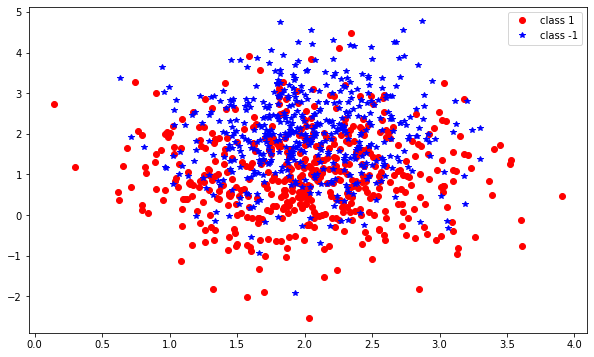

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.random.multivariate_normal([1, 2], [[1, 0], [0, 0.36]], 500)
x2 = np.random.multivariate_normal([2, 2], [[1, 0], [0, 0.25]], 500)

plt.figure(figsize = (10, 6))
plt.plot(x1.T[1], x1.T[0], 'ro', label = 'class 1')
plt.plot(x2.T[1], x2.T[0], 'b*', label = 'class -1')
plt.legend()

In [9]:
x = np.concatenate((x1, x2), axis = 0).T
y = np.array([500*[1] + 500*[-1]]).reshape(-1)

x_train, x_test, y_train, y_test = train_test_split(x.T, y, test_size=0.3, random_state = 42)
clf = AdaBoostClassifier(n_estimators = 30,
                         learning_rate = 1)
model = clf.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6399999999999999


## 3. Gradient Boosting.

`Gradient boosting (GB)` is a `machine learning algorithm` developed in the late '90s that is still very popular. It produces state-of-the-art results for many commercial (and academic) applications.

### 3.1. How an Ensemble Is Built
Here comes the most interesting part. `Gradient boosting` builds an ensemble of trees **`one-by-one`**, then the predictions of the `individual trees` are summed:

$$D(\mathbf{x}) = d_\text{tree 1}(\mathbf{x}) + d_\text{tree 2}(\mathbf{x}) + \ldots$$

The next `decision tree` tries to cover the discrepancy between the target function f(\mathbf{x})f(x) and the current ensemble prediction by reconstructing the residual.

For example, if an ensemble has 3 trees the prediction of that ensemble is:

$$ D(\mathbf{x}) = d_\text{tree 1}(\mathbf{x}) + d_\text{tree 2}(\mathbf{x}) + d_\text{tree 3}(\mathbf{x})$$

The `next tree` ($\text{tree 4}$) in the `ensemble` should complement well the existing trees and minimize the training error of the ensemble.
In the ideal case we'd be happy to have:

$$D(\mathbf{x}) + d_\text{tree 4}(\mathbf{x}) = f(\mathbf{x}).$$

To get a `bit closer` to the destination, we train a tree to reconstruct the difference between the target function and the current predictions of an ensemble, which is called the ***`residual`***:
$$R(\mathbf{x}) = f(\mathbf{x}) - D(\mathbf{x}).$$

Did you notice? If decision tree completely reconstructs $R(\mathbf{x})$, the whole ensemble gives predictions without errors (after adding the newly-trained tree to the ensemble)! That said, in practice this never happens, so we instead continue the iterative process of ensemble building.

### 3.2. Gradient boosting algorithms.

#### 3.2.1. General type.

This algorithm is used to approximate the gradient by parameterizing $h(x, a_m)$, 

At each iteration $m$, we calculate $\tilde{y}_m$ then the $\{-\tilde{y}_i, \mathbf{x}_i\}_1^N$ becomes a `training-set` to train $h(x, a_m)$ then finally predict the $\tilde{y}_m$

**`Gradient_Boost()`**
$$ F_0(\mathbf{x}) = \underset{\rho}{\text{argmin}} \sum_{i=1}^N L(y_i, \rho)$$

**`for`** `m` = 1 to N **`do`**:

$\qquad \qquad$ `gradient step`:

$ \qquad \qquad \qquad \qquad \qquad \qquad \tilde{y} = -\left[ \dfrac{\partial L(y_i, F(\mathbf{x_i}))}{\partial F(\mathbf{x_i})} \right]_{F(\mathbf{x}) = F_{m-1}(\mathbf{x})}, i = 1, \ldots,N $

$\qquad \qquad \qquad \qquad \qquad \qquad a_m = \underset{a, \beta}{\text{argmin}} \sum_{i=1}^N \left[ \tilde{y} - \beta h(x_i; a) \right]$
  
$\qquad \qquad$ `boosting step`:

$\qquad \qquad\qquad \qquad\qquad \qquad\rho_m = \underset{\rho}{\text{argmin}} \sum_{i=1}^N L \left( y_i, F_{m-1}(x_i) \right) + \rho h(x_i; \mathbf{a_m})$

$\qquad \qquad\qquad \qquad\qquad \qquad  F_m(\mathbf{x}) = F_{m-1}(\mathbf{x}) + \rho_m h(x; \mathbf{a_m})$

Hence, 
- $\tilde{y}_i$ also is the `gradient` of `function space` and the `label` of `parameter space`. 
- $\beta$ is the `leanring rate` to determine $\mathbf{a}_m$ and 
- $\rho_m$ is the `learning rate` for boosting additive model $F_m(\mathbf{x})$.

#### 3.2.2. Gradient boosting: Least-squares loss.

The `LS loss` is now defined by $L(y,F) = \frac{(y-F)^2}{2}$

Initialize $F_0(\mathbf{x}) = \bar{y}$, then

**`for`** $m = 1$ to $N$ **`do`:**

$\qquad \qquad \qquad \tilde{y} = y_i - F_{m-1}(x_i), i = 1, N$

$\qquad \qquad \qquad (\rho_m, \mathbf{a_m}) = \underset{a, \rho}{\text{argmin}} \sum_{i=1}^N \lbrack \tilde{y_i} - \rho h(x_i; a) \rbrack$

$\qquad \qquad \qquad F_m(\mathbf{x}) = F_{m-1}(\mathbf{x}) + \rho_m h(x; \mathbf{a_m})$

#### 3.2.3. Gradient boosting: Least-absolute-deviation loss

In this case, the `LAD loss` is defined by $ L(y,F) = |y - F|$, so

$$ \begin{array}{rcl} \rho_{m} & = & \underset{\rho}{\text{argmin}} \sum_{i=1}^{N}|y_{i}-F_{m-1}(\mathbf{x}_{i})-\rho h(\mathbf{x}_{i};\mathbf{a}_{m})|\\
&=&\underset{\rho}{\text{argmin}}\sum_{i=1}^{N}|h(\mathbf{x}_{i};\mathbf{a}_{m})|\cdot \left\vert \dfrac{y_{i}-F_{m-1}(\mathbf{x}_{i})}{h(\mathbf{x}_{i};\mathbf{a}_{m})}-\rho \right\vert\\
&=& \underset{w}{\text{median}} \left\lbrace \dfrac{y_{i}-F_{m-1}(\mathbf{x}_{i})}{h(\mathbf{x}_{i};\mathbf{a}_{m})} : \text{where } w_{i}=|h(\mathbf{x}_{i};\mathbf{a}_{m})| \right\rbrace_{1}^{N} . \end{array} $$

So, the `base-learner` be  $$h(\mathbf{x}; \{b_j, R_j\}) = \sum_{j=1}^J b_j\mathbf{1}(\mathbf{x} \in R_j)$$
where 
- $R_j$ is `regression tree` with `J-terminal node`, 
- $\{R_j\}_1^J$ is `disjoint regions`, 
- $\{b_j\}_1^J$ be the `coeficients` of each `decision`. 

If $\mathbf{x} \in R_j$ then $h(\mathbf{x}) = b_j.$

Hence, the `boosting function` will be 

$$F_m(\mathbf{x}) = F_{m-1}(\mathbf{x}) + \sum_{j=1}^J \gamma_{jm}\mathbf{1} (\mathbf{x} \in R_{jm}). $$
where $\gamma_{jm} = \rho_m b_{jm}$.

Initialize $F_0(\mathbf{x}) = \text{median}\{y_i\}_1^N$, then following is the **`algorithm`**

**`for`** $m = 1$ to $N$ **`do`:**

$ \qquad \qquad \qquad \tilde{y_i} = \text{sign} (y_i - F_{m-1}(x_i)), \quad i = 1, \ldots, N$

$\qquad \qquad \qquad \{R_{jm}\}_1^J = J$- `terminal node tree` $(\{\tilde{y_i}, x_i\}_1^N)$

$\qquad \qquad \qquad \gamma_{jm} = \underset{x_{i}\in R_{jm}}{\text{median}} \{y_i - F_{m-1}(x_i)\}, j = 1, \ldots, J$

$\qquad \qquad \qquad F_m(\mathbf{x}) = F_{m-1}(\mathbf{x}) + \sum_{j=1}^J \gamma_{jm} 1(x \in R_{jm})$

#### 3.2.4. Gradient boosting: Binary classification

`Negative binomial log-likelihood`: $$L(y,F) = \log \lbrack 1 + \exp(-2yF)\rbrack, \quad y = \{-1,1\}.$$ 

We have $$\rho_m = \underset{\rho}{\text{argmin}} \sum_{i=1}^N \log(1 + \exp(-2y_i(F_{m-1}(\mathbf{x}_i) + \rho h(\mathbf{x}_i; \mathbf{a}_m)))).$$

For `base learner`, the term $$\gamma_{jm} = \underset{\gamma}{\text{argmin}} \sum_{\mathbf{x}_j \in R_{jm}} \log(1 + \exp(-2y_i(F_{m-1}(\mathbf{x}_i) + \gamma)))$$ will be approximated by **`Newton-Raphson step`**, as follow

$$\gamma_{jm} = \sum_{\mathbf{x}_j \in R_{jm}} \dfrac{\tilde{y}_i}{\sum_{\mathbf{x}_j \in R_{jm}} |\tilde{y}_i| (2 - |\tilde{y}_i|)}.$$

**`L_2_TreeBoost`**

**Initialize** $F_0(\mathbf{x}) = \dfrac{1}{2} log \frac{1 + \bar{y}}{1 - \bar{y}}$

**`for`** m = 1 to M **`do`:**

$ \qquad \qquad \qquad \tilde{y_i} = \dfrac{2 y_i}{1 + \exp(2 y_i F_{m-1}(x_i))}, i = 1, \ldots,N$

$ \qquad \qquad \qquad \{R_{jm}\}_1^J = J-$ `terminal node tree` $(\{\tilde{y_i}, x_i\}_1^N) $

$ \qquad \qquad \qquad \gamma_{jm} = \sum_{x_i \in R_{jm}} \dfrac{\tilde{y_i}}{\sum_{x_i \in R_{jm}} |\tilde{y_i}| (2 - |\tilde{y_i}|)}, \quad j = 1, \ldots, J $

$ \qquad \qquad \qquad F_m(\mathbf{x}) = F_{m-1}(\mathbf{x}) + \sum_{j=1}^J \gamma_{jm} \textbf{1}_{(x \in R_{jm})} $

## 4. XGBoost : Extreme Gradient Boosting.

`XGBoost` is one of the most popular `machine learning algorithm` these days. Regardless of the type of prediction task at hand; `regression or classification`.

First, we denote:

- $n:$  number of `training_samples`.
- $m:$ number of features.
- $\mathcal{D} = \{(\mathbf{x}_i, y_i)\}:$ dataset with $|\mathcal{D}| = n,\mathbf{x}_i \in \mathbb{R}^m, y_i \in \mathbb{R}.$
- $q:$ structure of tree; a map from node to corresponding leaf.
- $T:$ number of node, leaf.
- $f_k:$ structure of `k` independence trees in the model.
- $w_i:$ weight of the `i`-th node.
- $\hat{y}_i^{(t)}:$ prediction of the `i`-th observation at the round $t$.
- $I_j = \{i|q(\mathbf{x}_i) = j\}:$ set of the node `i`-th
- $I_L, I_R:$ set of the **`left, right`** node/leaf.
- $I = I_L \cup I_R.$

We have the `model`
$$ \hat{y}_i = \phi(\mathbf{x}_i) = \Sigma_{k=1}^K f_k(\mathbf{x}_i), f_k \in \mathcal{F}.$$ 
where, $\mathcal{F} = \{f(\mathbf{x}) = w_{q(\mathbf{x})}\} (q : \mathbb{R}^m) \rightarrow T, w \in \mathbb{R}^T.$

and

$$\mathcal{L}(\phi) = \sum_i l(\hat{y}_i, y_i) + \sum_k \Omega(f_k).$$ where, 
$$\Omega(f) = \gamma T + \frac{1}{2} \lambda ||w||^2$$

#### Example 2. `Breast_cancer dataset`

In [10]:
from numpy import loadtxt 
from xgboost import XGBClassifier   ## !pip install xgboost
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# load data
breast_cc = load_breast_cancer()
breast_cc.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [11]:
# split data into X and y 
X = breast_cc['data']
y = breast_cc['target']

print('Features in this data: \n', breast_cc.feature_names)
print('\nShape of data & target = ', X.shape, y.shape)
print(breast_cc.filename)

Features in this data: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Shape of data & target =  (569, 30) (569,)
C:\Users\Admin\.conda\envs\projecy\lib\site-packages\sklearn\datasets\data\breast_cancer.csv


**To get full_description of the dataset, press `.DESCR`**

In [12]:
print(breast_cc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)
eval_set = [(X_train, y_train), (X_test, y_test)]
 
# fit model no training data 
model = XGBClassifier(max_depth = 30) 
model.fit(X_train, y_train, eval_metric="auc", eval_set=eval_set,
           early_stopping_rounds=30, verbose=True)
 
print(model)

[0]	validation_0-auc:0.99159	validation_1-auc:0.93664
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.99515	validation_1-auc:0.97221
[2]	validation_0-auc:0.99972	validation_1-auc:0.97074
[3]	validation_0-auc:0.99954	validation_1-auc:0.97487
[4]	validation_0-auc:0.99985	validation_1-auc:0.97752
[5]	validation_0-auc:0.99985	validation_1-auc:0.97770
[6]	validation_0-auc:0.99991	validation_1-auc:0.97788
[7]	validation_0-auc:0.99994	validation_1-auc:0.98336
[8]	validation_0-auc:0.99994	validation_1-auc:0.98442
[9]	validation_0-auc:1.00000	validation_1-auc:0.98384
[10]	validation_0-auc:1.00000	validation_1-auc:0.98372
[11]	validation_0-auc:1.00000	validation_1-auc:0.98277
[12]	validation_0-auc:1.00000	validation_1-auc:0.98218
[13]	validation_0-auc:1.00000	validation_1-auc:0.98242
[14]	validation_0-auc:1.00000	validation_1-auc:0.98171
[15]	validation_0-auc:1.0000

Accuracy: 92.02%


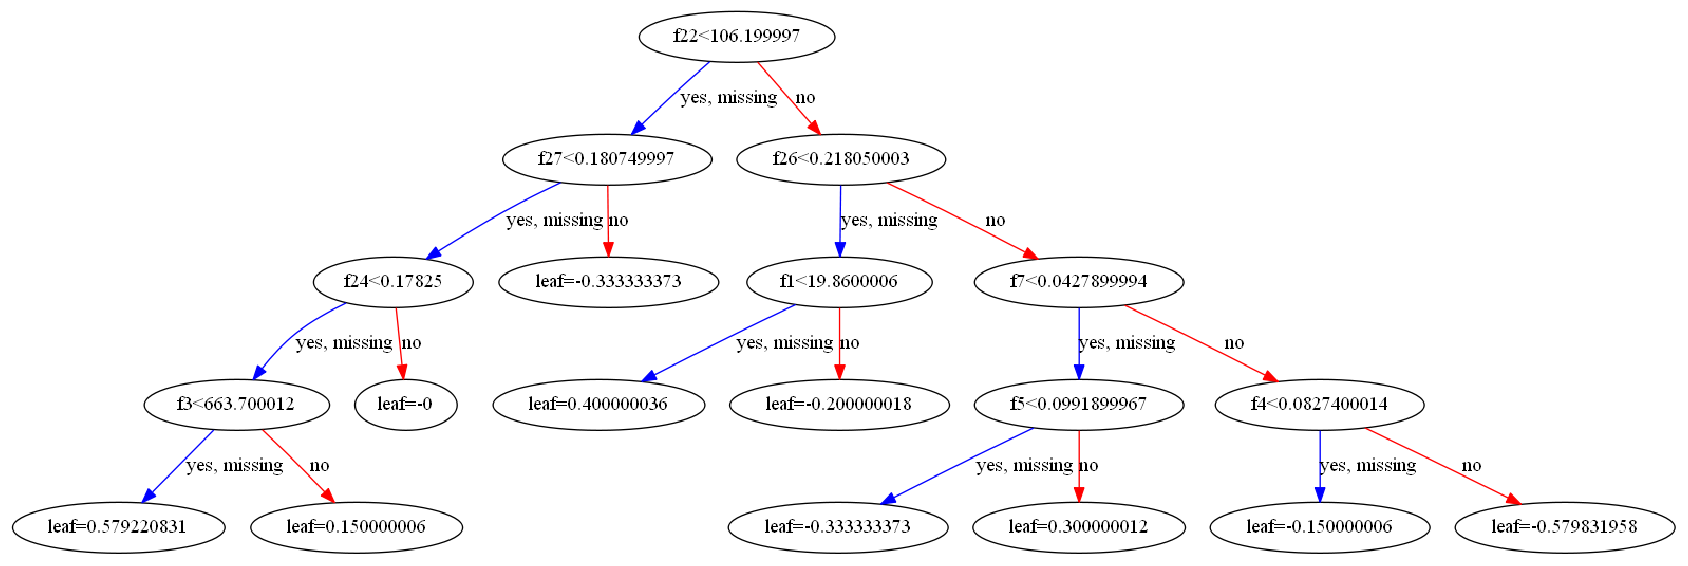

In [14]:
# make predictions for test data 
y_pred = model.predict(X_test) 
predictions = [round(value) for value in y_pred]
 
# evaluate predictions 
accuracy = accuracy_score(y_test, predictions) 
print("Accuracy: %.2f%%" % (accuracy * 100.0))
 
# tree plot
from xgboost import plot_tree
plt.rcParams['figure.figsize'] = [30, 30]
plot_tree(model)
plt.show()

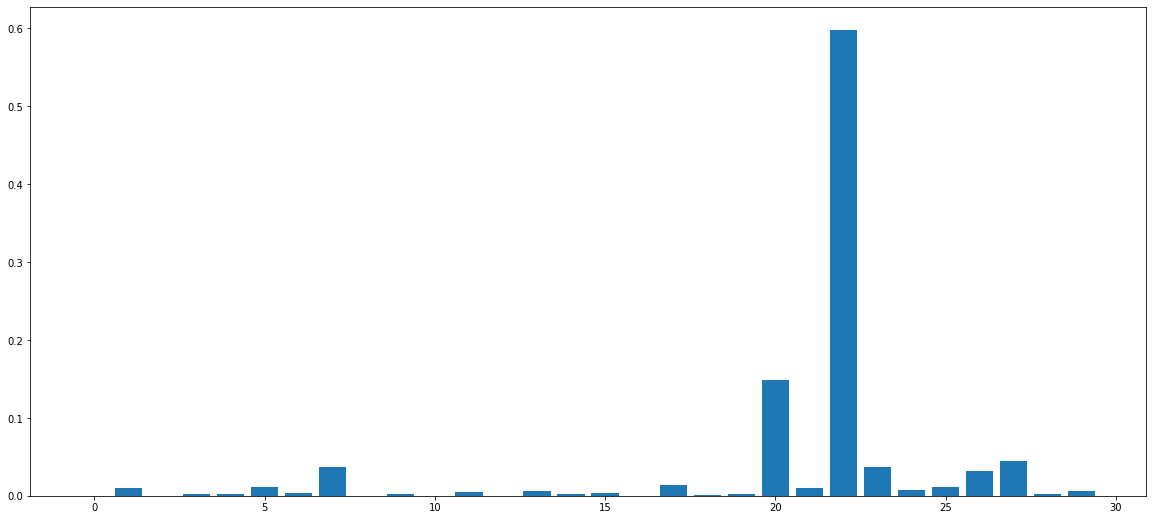

In [15]:
# feature important plot
plt.figure(figsize = (20, 9))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

<Figure size 1440x1080 with 0 Axes>

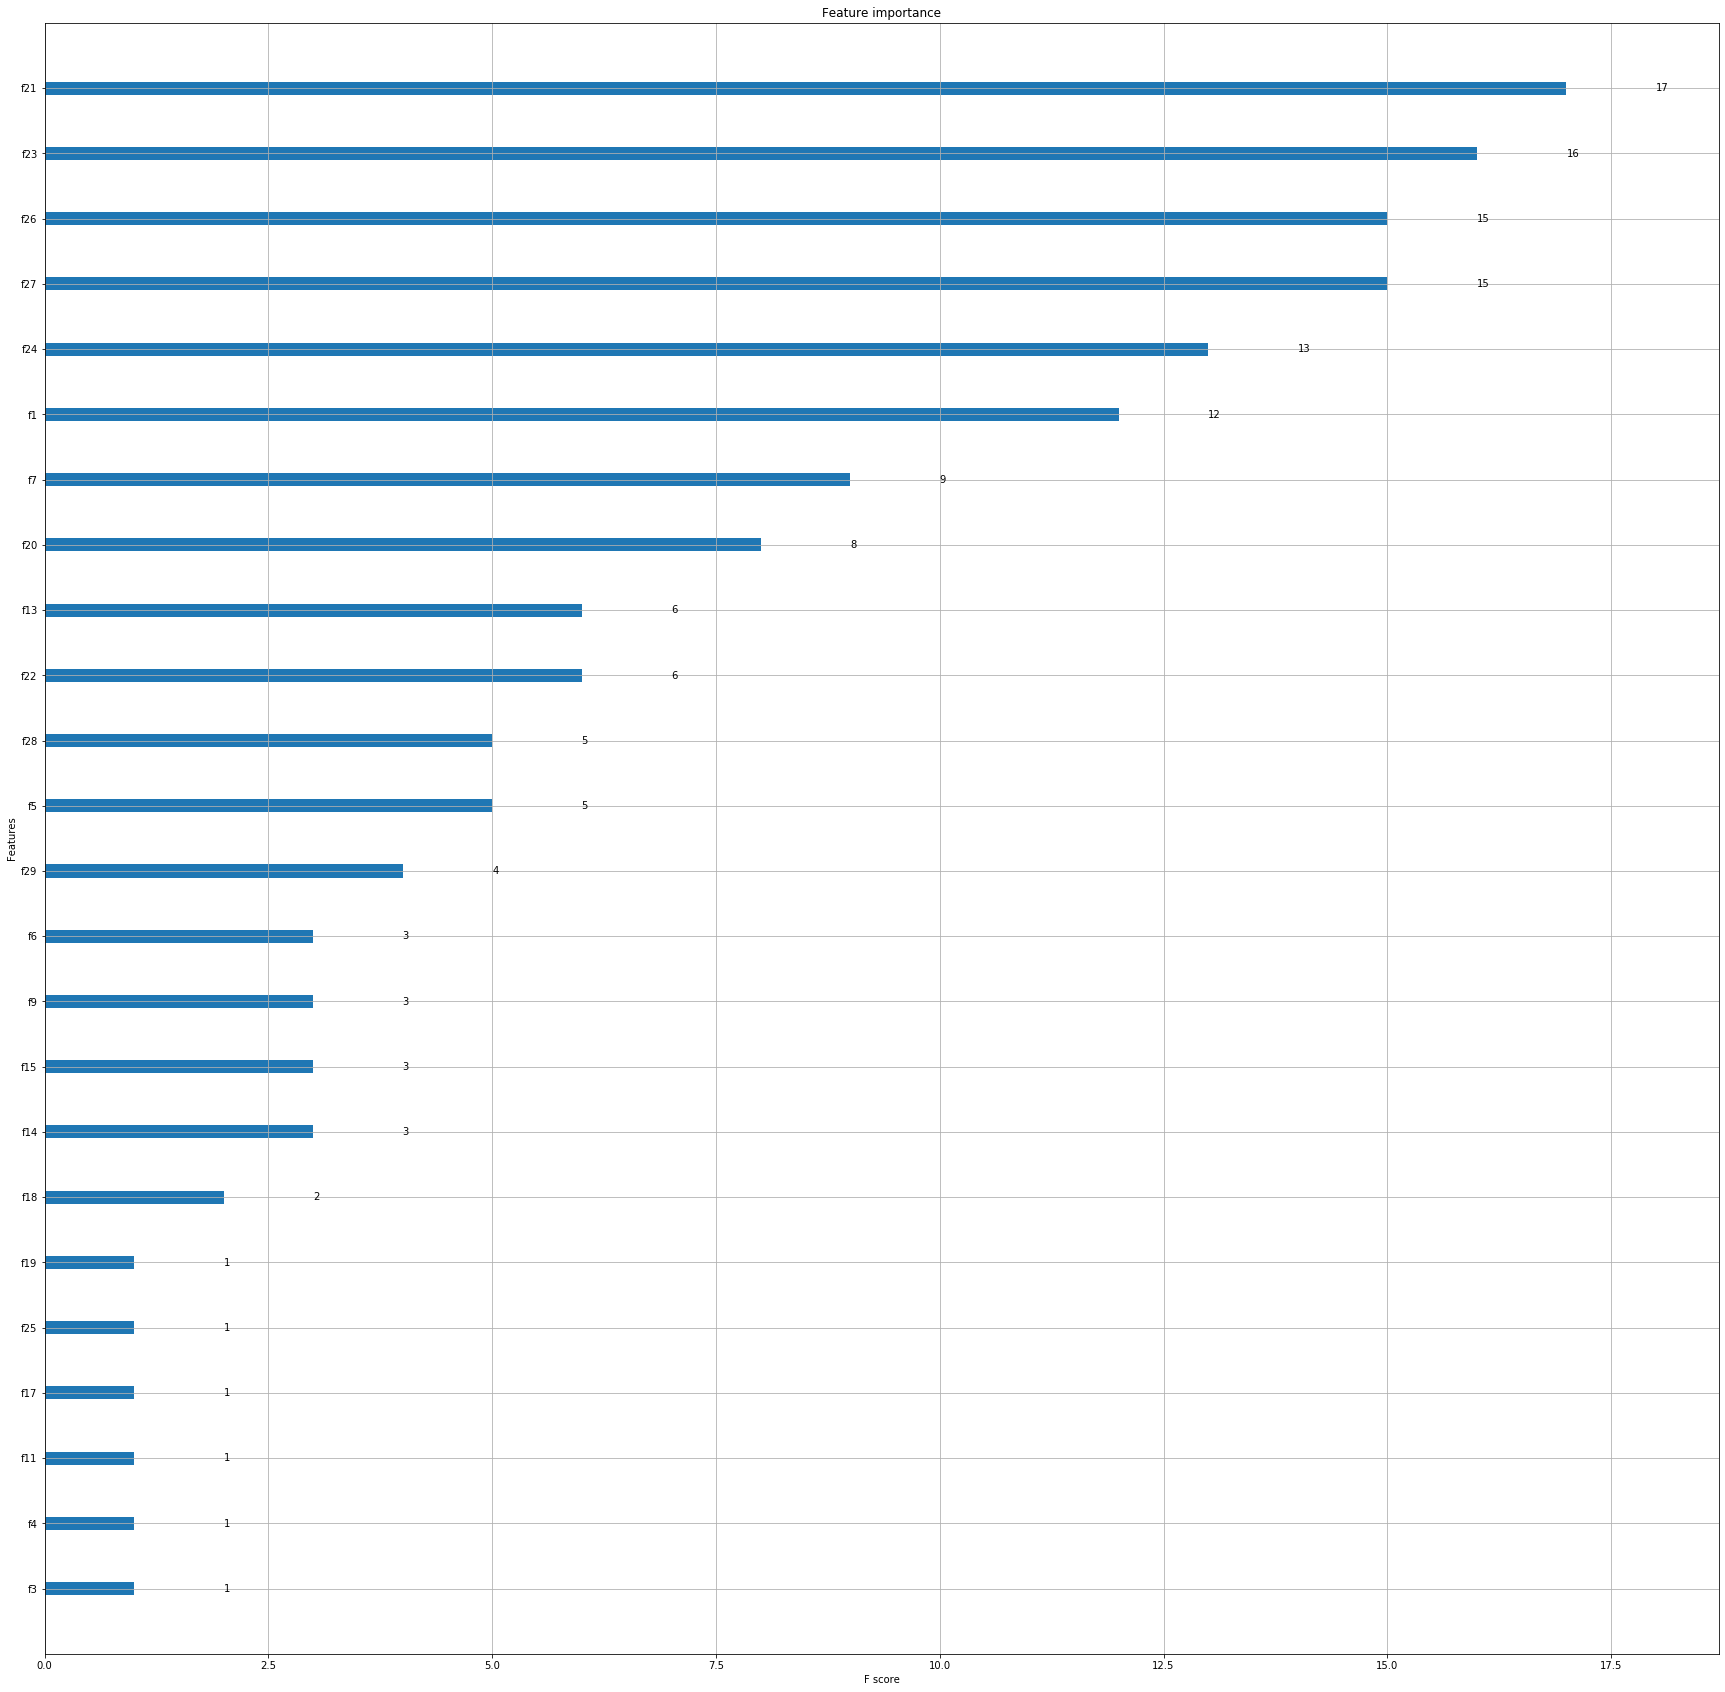

In [16]:
# default plot
from xgboost import plot_importance
plt.figure(figsize = (20, 15))
plot_importance(model)
plt.show()

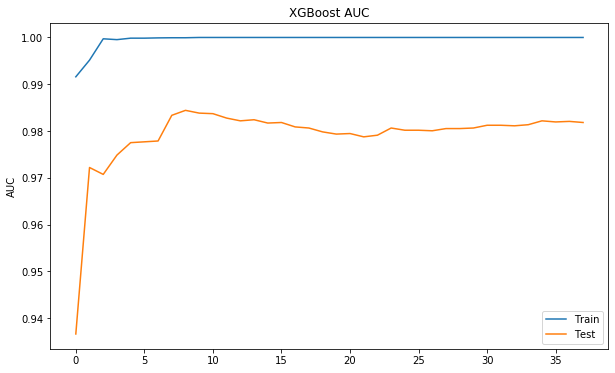

In [17]:
# evaluation plot
# retrieve performance metrics 
results = model.evals_result()
epochs = len(results['validation_0' ]['auc'])
x_axis = range(0, epochs)
 
fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()

#### Example 3. Boston dataset

In [18]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains. Y

In [19]:
import xgboost
X = boston['data']
y = boston['target']
data_dmatrix = xgboost.DMatrix(data=X,label=y)

**XGBoost's hyperparameters**

At this point, before building the model, you should be aware of the tuning parameters that `XGBoost` provides. Well, there are a plethora of tuning parameters for `tree-based` learners in `XGBoost` and you can read all about them here. But the most common ones that you should know are:

- `learning_rate:` step size shrinkage used to prevent overfitting. Range is [0,1]
- `max_depth:` determines how deeply each tree is allowed to grow during any boosting round.
- `subsample:` percentage of samples used per tree. Low value can lead to underfitting.
- `colsample_bytree:` percentage of features used per tree. High value can lead to overfitting.
- `n_estimators:` number of trees you want to build.
- `objective:` determines the loss function to be used like `reg:linear (old version) / reg:squarederror (current)` for regression problems, `reg:logistic` for classification problems with only decision, `binary:logistic` for classification problems with probability.

XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple (parsimonious) models.

- `gamma:` controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
- `alpha:` L1 regularization on leaf weights. A large value leads to more regularization.
- `lambda:` L2 regularization on leaf weights and is smoother than L1 regularization.

It's also worth mentioning that though you are using trees as your base learners, you can also use XGBoost's relatively less popular linear base learners and one other tree learner known as dart. All you have to do is set the booster parameter to either gbtree (default),gblinear or dart.

Now, you will create the train and test set for cross-validation of the results using the train_test_split function from sklearn's model_selection module with test_size size equal to 20% of the data. Also, to maintain reproducibility of the results, a random_state is also assigned.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 33)

The next step is to instantiate an `XGBoost regressor object` by calling the `XGBRegressor()` class from the `XGBoost` library with the hyper-parameters passed as arguments. For classification problems, you would have used the `XGBClassifier()` class.

After that, fit the `regressor` to the training set and make predictions on the test 

In [21]:
xg_reg = xgboost.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train, y_train)

preds = xg_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 9.293571


Now then, our `RMSE` for the price prediction came out to be around 9.293 per `1000$`.

----------------------------

**`k-fold` Cross Validation using XGBoost**

In order to build more robust models, it is common to do a k-fold cross validation where all the entries in the original training dataset are used for both training as well as validation. Also, each entry is used for validation just once. XGBoost supports `k-fold` cross validation via the `cv()` method. All you have to do is specify the nfolds parameter, which is the number of cross validation sets you want to build. Also, it supports many other parameters (check out this link) like:

- `num_boost_round:` denotes the number of trees you build (analogous to n_estimators)
- `metrics:` tells the evaluation metrics to be watched during `CV`
- `as_pandas:` to return the results in a pandas DataFrame.
- `early_stopping_rounds:` finishes training of the model early if the hold-out metric (`"rmse"` in our case) does not improve for a given number of rounds.
- `seed:` for reproducibility of results.

This time you will create a hyper-parameter dictionary params which holds all the hyper-parameters and their values as key-value pairs but will exclude the `n_estimators` from the hyper-parameter dictionary because you will use num_boost_rounds instead.

You will use these parameters to build a `3-fold` cross validation model by invoking `XGBoost`'s `cv()` method and store the results in a cv_results `DataFrame`. Note that here you are using the Dmatrix object you created before.

In [22]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgboost.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.750758,0.036152,21.765523,0.028849
1,19.778532,0.077649,19.830760,0.031760
2,18.052810,0.118632,18.157336,0.116038
3,16.458958,0.169189,16.623975,0.191413
4,15.074781,0.183545,15.254608,0.213612


In [23]:
print((cv_results["test-rmse-mean"]).tail(1))

49    3.99692
Name: test-rmse-mean, dtype: float64


You can see that your `RMSE` for the price prediction has reduced as compared to last time and came out to be around 4.03 per 1000$. You can reach an even lower `RMSE` for a different set of hyper-parameters. You may consider applying techniques like `Grid Search`, `Random Search` and `Bayesian Optimization` to reach the optimal set of `hyper-parameters`.

**Visualize Boosting Trees and Feature Importance**

You can also visualize individual trees from the fully boosted model that XGBoost creates using the entire housing dataset. `XGBoost` has a `plot_tree()` function that makes this type of visualization easy. Once you train a model using the `XGBoost learning API`, you can pass it to the `plot_tree() function` along with the number of trees you want to plot using the num_trees argument.

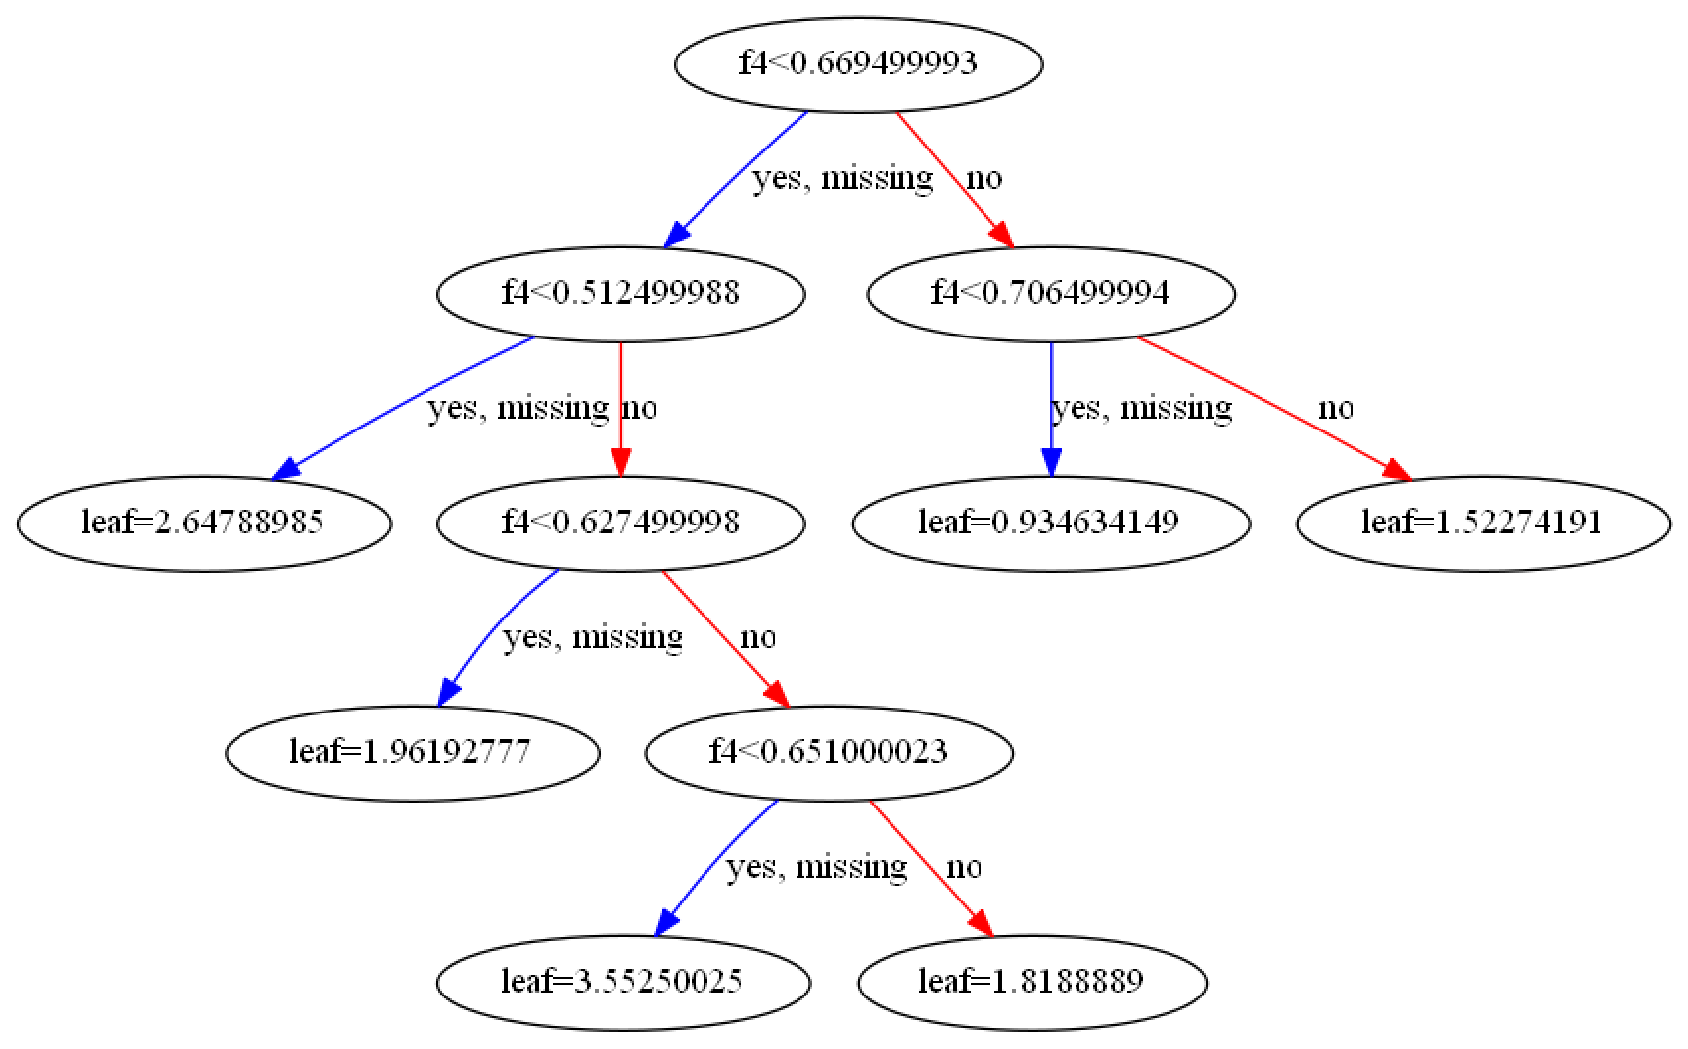

In [24]:
xg_reg = xgboost.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
xgboost.plot_tree(xg_reg, num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

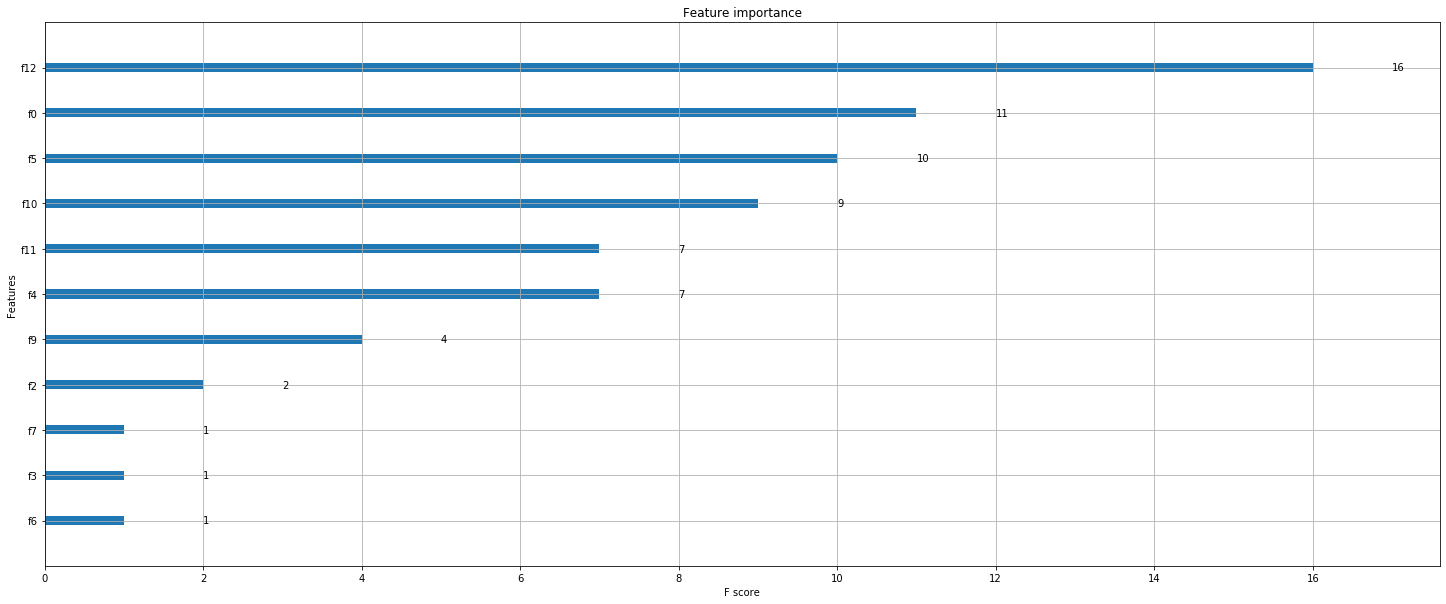

In [26]:
xgboost.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [25, 10]
plt.show()

### References:

https://www.datacamp.com/community/tutorials/xgboost-in-python

https://www.datacamp.com/community/tutorials/adaboost-classifier-python